In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from six.moves import cPickle as pickle
from IPython.display import display, Image
import random 
from scipy.misc import imread, imresize
from sklearn.utils import shuffle
from skimage import exposure

In [ ]:
root=r"C:/Users/STEVE/Desktop/data/signal images/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images"
class_folders = os.listdir(root)
X=np.empty([0,32, 32,3], dtype=np.float32)
labels=np.empty([0])
names=np.empty([0])
for class_folder in class_folders[:21]:
    class_path=os.path.join(root,class_folder)
    images=os.listdir(class_path)
    for image in images:
        f=image.find('.')
        ftype=image[f+1:]
        if ftype=='ppm': 
            img_path=os.path.join(class_path,image)
            img=imread(img_path)
            newimg=imresize(img, (32,32,3))
            newlabel=int(class_folder)
            X=np.append(X,[newimg], axis=0 )
            labels=np.append(labels,newlabel )
            names=np.append(names,image )
    print(int(class_folder))

C:\Users\STEVE\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\STEVE\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


0
1
2
3
4
5
6


In [4]:
def get_class_sample(X, labels):
    #n_image=len(np.unique(labels))
    sample_images=np.empty([0,32, 32,3], dtype=np.float32)
    for i in np.unique(labels):
        ind=np.argwhere(labels==i).reshape(-1)[0]
        sample=X[ind,:,:,:]
        sample_images=np.append(sample_images,[sample], axis=0 )
    return sample_images
sample_images=get_class_sample(X, labels)

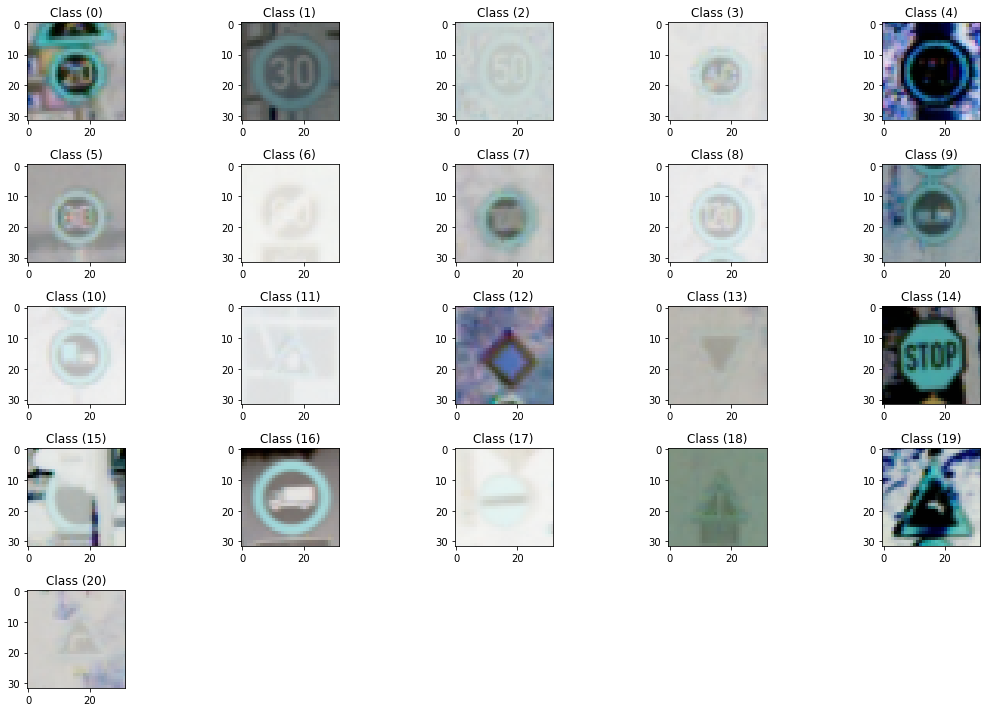

In [5]:
def display_class_samples(class_samples, cols):
    fig = plt.figure(figsize=(15,10))
    n_image=len(class_samples)
    titles = ['Class (%d)' % i for i in range(0,n_image )]
    for n, (sample, title) in enumerate(zip(sample_images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_image/float(cols)), n + 1)
        plt.imshow(sample)
        a.set_title(title)
    plt.tight_layout()
    plt.show()
display_class_samples(sample_images, 5)

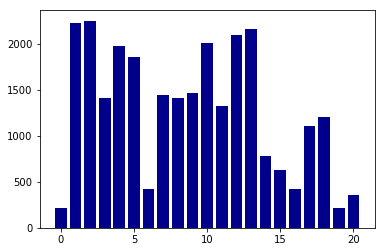

In [18]:
count=[]
for i in np.unique(labels):
    size=np.ravel(np.argwhere(labels==i)).shape[0]
    count.append(size)

fig, ax=plt.subplots(1,1)
ax.bar(np.unique(labels), np.array(count), color='darkBlue')
plt.show()    

In [71]:
def mirror_single_class(M,l, mirror_type):
    if mirror_type=='h':  return M[:, :, ::-1, :], np.repeat(l,M.shape[0])
    elif mirror_type=='v': return M[:, ::-1, :, :], np.repeat(l,M.shape[0])
    elif mirror_type=='hv': return M[:, ::-1, ::-1, :], np.repeat(l,M.shape[0])
    else: 
        Print("inappropriate mirror_type. It has to be either 'h', 'v', or 'hv ")
        return 

h_symmetric = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
v_symmetric = [1, 5, 12, 15, 17]
hv_symmetric = [32, 40]
cross_symmetric = [[19, 20], [33, 34], [36, 37], [38, 39] ]

def mirror_multiple_classes(X,labels, class_list, mirror_type):
    X_=np.empty([0,32, 32,3], dtype=np.float32)
    labels_=np.empty([0])
    for i in class_list:
        mirrored, mirror_label=mirror_single_class(X[labels==i],i, mirror_type)
        X_=np.append(X_,mirrored, axis=0)
        labels_=np.append(labels_,mirror_label, axis=0)
    return X_, labels_
hx,hl=mirror_multiple_classes(X,h_symmetric, 'h')
vx,vl=mirror_multiple_classes(X,v_symmetric, 'v')
hvx,hvl=mirror_multiple_classes(X,hv_symmetric, 'hv')
for x,l in zip([hx,vx,hvx], [hl,vl,hvl]):
    X=np.append(X,x,axis=0)
    labels=np.append(labels,l,axis=0)

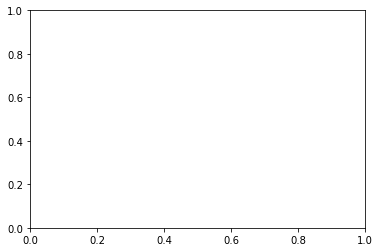

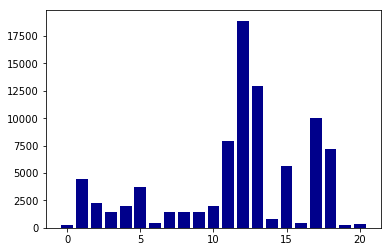

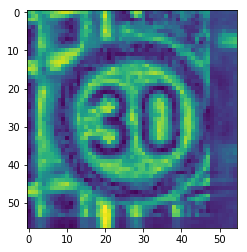

In [7]:
plt.imshow(ss,interpolation='nearest')
plt.show()

19
sample image for 00000_00001.ppm and 19


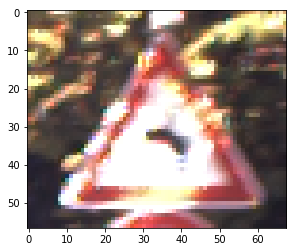

In [14]:
display_category(19)

In [ ]:
self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
self_flippable_vertically = np.array([1, 5, 12, 15, 17])
self_flippable_both = np.array([32, 40])
cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
num_classes = 43
